# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [ ]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(db_K, image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    if db_K != -1:
      plt.title("DBSCAN samples equals to {}".format(db_K))
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

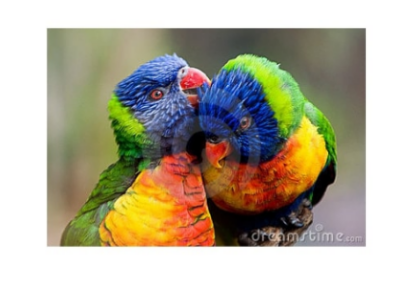

In [ ]:
img = cv2.imread('birds.png') # считать картинку
draw_picture(-1, img) # нарисовать картинку

In [ ]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(286, 402, 3)


In [ ]:
# импорты
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from skimage.transform import resize


In [ ]:
img = img/255.0
X = img.reshape(-1, 3)

X.shape

(114972, 3)

# **KMeans**

In [ ]:
def KMEANS(K):
  kmeans = KMeans(n_clusters = K)
  kmeans.fit(X)
  segment = kmeans.cluster_centers_
  segment = segment[kmeans.labels_]
  segment = segment.reshape(img.shape)
  draw_picture(-1, segment)
  print('Loss for structural_similarity is {}'.format(ssim(img, segment, multichannel=True)))


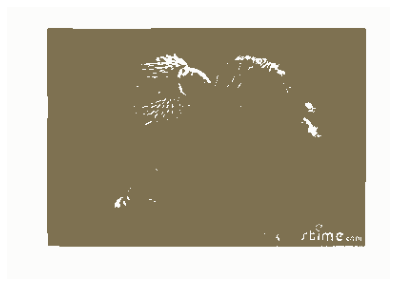

Loss for structural_similarity is 0.7019545330359147


In [ ]:
# n_clusters = 2
KMEANS(K = 2)

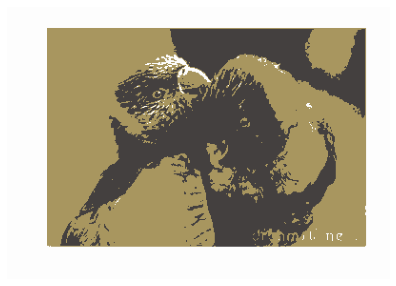

Loss for structural_similarity is 0.7638567500332103


In [ ]:
# n_clusters = 3
KMEANS(K = 3)

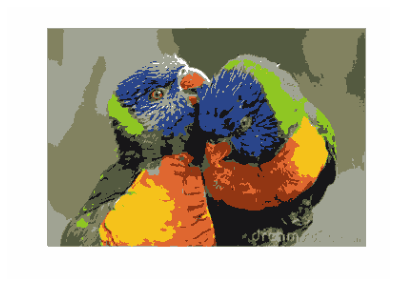

Loss for structural_similarity is 0.830163178768505


In [ ]:
# n_clusters = 10
KMEANS(K = 10)

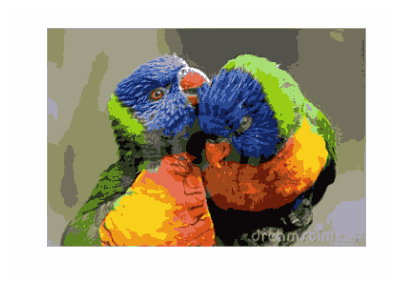

Loss for structural_similarity is 0.8854084139437347


In [ ]:
# n_clusters = 20
KMEANS(K = 20)

# **DBSCAN**

In [ ]:
img_resized = resize(img, (img.shape[0] // 2, img.shape[1] // 2, 3),
                       anti_aliasing=True)
my_img = img_resized.reshape(-1, 3)


In [ ]:
def find_centers(image, labels):
  centers = []
  for i in np.unique(labels):
    centers.append(np.median(image[labels == i], axis = 0))
  return np.array(centers)

In [ ]:
min_samples = [1, 3, 5, 7, 10, 20]
images = []

for item in min_samples:
  db = DBSCAN(eps = 0.015, min_samples = item, n_jobs = -1)
  db.fit(my_img)
  cluster_centers = find_centers(my_img, db.labels_)
  new_img = cluster_centers[db.labels_].reshape(img_resized.shape)
  images.append(new_img)


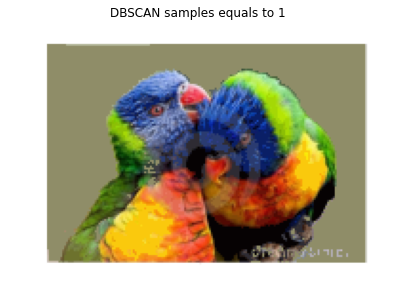

Loss for structural_similarity is 0.9469890464792149


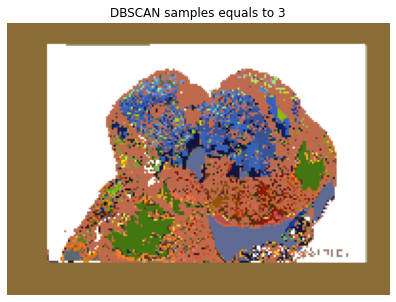

Loss for structural_similarity is 0.27896386494320663


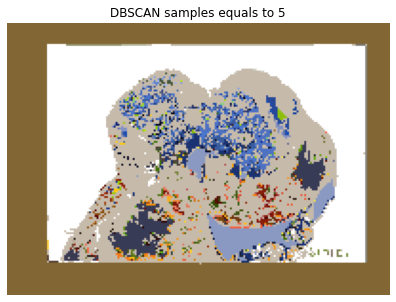

Loss for structural_similarity is 0.24346733689016475


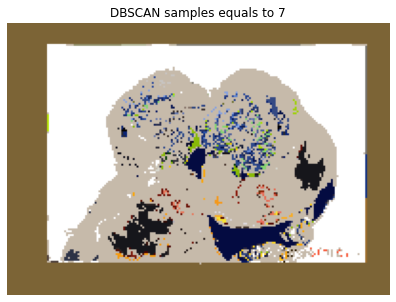

Loss for structural_similarity is 0.2643943369679897


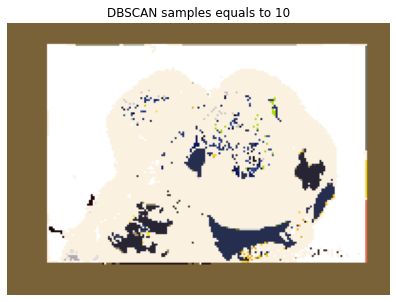

Loss for structural_similarity is 0.2557139184986364


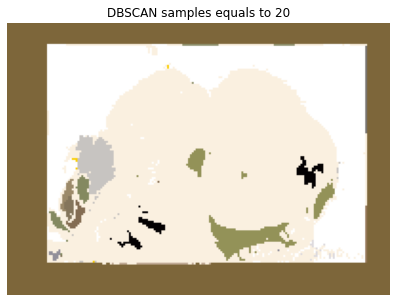

Loss for structural_similarity is 0.2557620507809927


In [ ]:
zipped = zip(images, min_samples)

for item in zipped:
  draw_picture(item[1], item[0])
  print('Loss for structural_similarity is {}'.format(ssim(item[0], img_resized, multichannel=True)))

# **AgglomerativeClustering**

In [ ]:
def draw_picture_agg(db_K, image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title("Agglomerative Clustering samples equals to {}".format(db_K))
    plt.show()

In [ ]:
clusters = [1, 3, 10, 20]
agg_images = []

for item in clusters:
  agglomerative = AgglomerativeClustering(n_clusters = item)
  agglomerative.fit(my_img)
  aggcluster_centers = find_centers(my_img, agglomerative.labels_)
  new_img = aggcluster_centers[agglomerative.labels_].reshape(img_resized.shape)
  agg_images.append(new_img)


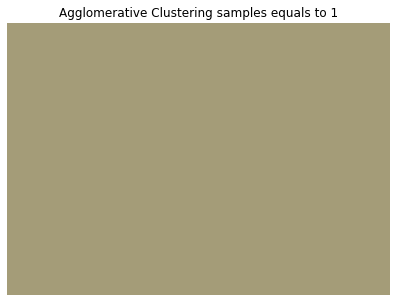

Loss for structural_similarity is 0.4995118877291167


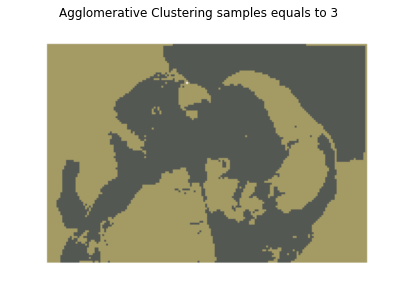

Loss for structural_similarity is 0.7119746667821563


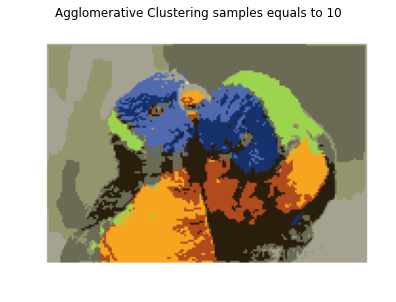

Loss for structural_similarity is 0.8116930971090387


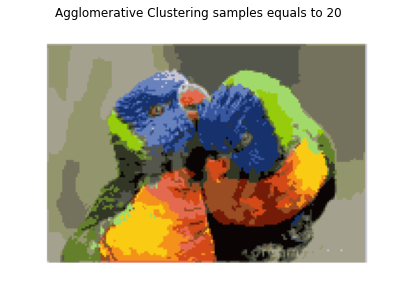

Loss for structural_similarity is 0.880225453643964


In [ ]:
agg_zipped = zip(agg_images, clusters)

for item in agg_zipped:
  draw_picture_agg(item[1], item[0])
  print('Loss for structural_similarity is {}'.format(ssim(item[0], img_resized, multichannel=True)))

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [ ]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [ ]:
y.shape

(2370,)

In [ ]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

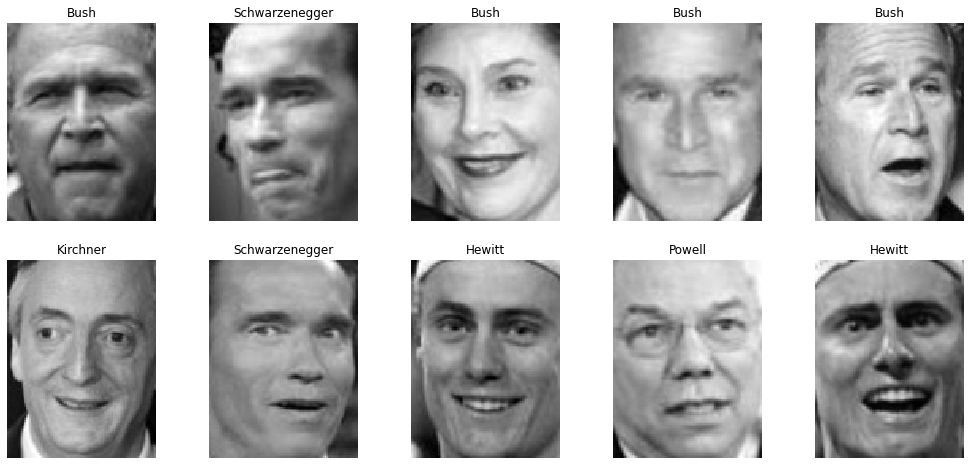

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]].rsplit(' ', 1)[-1])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

# **Const model**

In [ ]:
# определим самый частый класс
np.bincount(y).argmax() # 8-ой класс самый популярный (это Буш)

preds = np.tile(np.bincount(y).argmax(), reps = len(X_test))
print('accuracy for const model is {}'.format(accuracy_score(y_test, preds)))

accuracy for const model is 0.23839662447257384


# **PCA 2-D & 3-D Visualization**

In [ ]:
# 2-D PCA
pca = PCA(n_components = 2)
important_components = pca.fit_transform(X)

importantDF = pd.DataFrame(data = important_components, columns = ['component_1', 'component_2'])
DF = pd.concat([importantDF, pd.Series(names[y])], axis = 1)


In [ ]:
DF.rename(columns = {0: 'names'}, inplace = True)

In [ ]:
DF

,component_1,component_2,names
0,2523.134766,1490.560547,George W Bush
1,1973.148193,1064.682373,Arnold Schwarzenegger
2,-2402.042725,-2600.651611,Laura Bush
3,-3092.040527,-100.451424,George W Bush
4,-549.242981,1864.359741,George W Bush
...,...,...,...
2365,807.136108,637.806152,John Ashcroft
2366,-899.556458,-2105.706299,George W Bush
2367,4.297788,455.341034,George W Bush
2368,45.462627,3124.697754,Gloria Macapagal Arroyo


In [ ]:
# тут и дальше я решил брать не просто самых популярных, но разбавить их Путиным и Бэкхемом, просто потому что я их знаю  и так интереснее
# не снижайте пожалуйста за это ^-^
Counter(DF['names'])
names_viz = ['George W Bush', 'Vladimir Putin', 'Colin Powell', 'Tony Blair', 'David Beckham']

In [ ]:
DF_viz = DF.loc[DF['names'].isin(names_viz)]

In [ ]:
import plotly.io as pio
fig = px.scatter(DF_viz, title = '2-D PCA Result', x = DF_viz['component_1'], y = DF_viz['component_2'], color = DF_viz['names'])
fig.update_layout(width = 1000, height = 700)

In [ ]:
# 3-D PCA

pca = PCA(n_components = 3)
important_components = pca.fit_transform(X)

importantDF = pd.DataFrame(data = important_components, columns = ['component_1', 'component_2', 'component_3'])
DF_3D = pd.concat([importantDF, pd.Series(names[y])], axis = 1)

In [ ]:
DF_3D.rename(columns = {0: 'names'}, inplace = True)
DF_3D_viz = DF_3D.loc[DF_3D['names'].isin(names_viz)]

In [ ]:
fig = px.scatter_3d(
    DF_3D_viz, title = '3-D PCA Result', x=DF_3D_viz['component_1'][:100], y=DF_3D_viz['component_2'][:100], z=DF_3D_viz['component_3'][:100], color=DF_3D_viz['names'][:100],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# **T-SNE 2-D & 3-D Visualization**

In [ ]:
# 2-D Visualization
tsne = TSNE(n_components = 2)

important_components = tsne.fit_transform(X)

importantDF = pd.DataFrame(data = important_components, columns = ['component_1', 'component_2'])
DFtsne = pd.concat([importantDF, pd.Series(names[y])], axis = 1)

In [ ]:
DFtsne.rename(columns = {0: 'names'}, inplace = True)
DFtsne

,component_1,component_2,names
0,-14.616137,-31.813278,George W Bush
1,-12.128052,-34.406033,Arnold Schwarzenegger
2,-11.196514,45.789017,Laura Bush
3,7.122666,33.989235,George W Bush
4,29.578823,19.233334,George W Bush
...,...,...,...
2365,-8.213915,-16.388485,John Ashcroft
2366,-29.538393,5.037928,George W Bush
2367,27.525223,36.285973,George W Bush
2368,34.903366,-5.154666,Gloria Macapagal Arroyo


In [ ]:
names_viz = ['George W Bush', 'Vladimir Putin', 'Colin Powell', 'Tony Blair', 'David Beckham']
DF_viztsne = DFtsne.loc[DFtsne['names'].isin(names_viz)]

fig = px.scatter(DF_viztsne, title = '2-D T-SNE Result', x = DF_viztsne['component_1'], y = DF_viztsne['component_2'], color = DF_viztsne['names'])
fig.update_layout(width = 1000, height = 700)


In [ ]:
# 3-D TSNE
tsne = TSNE(n_components = 3)

important_components = tsne.fit_transform(X)

importantDF = pd.DataFrame(data = important_components, columns = ['component_1', 'component_2', 'component_3'])
DFtsne = pd.concat([importantDF, pd.Series(names[y])], axis = 1)


In [ ]:
DFtsne.rename(columns = {0: 'names'}, inplace = True)
DFtsne

,component_1,component_2,component_3,names
0,9.405312,-22.290516,-43.462532,George W Bush
1,22.249392,-21.118111,-44.125549,Arnold Schwarzenegger
2,-9.097658,32.435699,40.392998,Laura Bush
3,-34.597023,8.185325,29.250622,George W Bush
4,1.198172,-38.457939,35.943024,George W Bush
...,...,...,...,...
2365,-21.570683,2.369919,-58.439457,John Ashcroft
2366,-3.757207,50.005939,-27.667109,George W Bush
2367,-40.556442,-47.465820,13.229800,George W Bush
2368,-2.710189,-11.139717,64.400993,Gloria Macapagal Arroyo


In [ ]:
DFtsne_viz = DFtsne.loc[DFtsne['names'].isin(names_viz)]

In [ ]:
fig = px.scatter_3d(
    DFtsne_viz, title = '3-D T-SNE Result', x= DFtsne_viz['component_1'][:100], y= DFtsne_viz['component_2'][:100], z= DFtsne_viz['component_3'][:100], color= DFtsne_viz['names'][:100],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# **Classification PCA**

In [ ]:
clfpca = PCA(n_components = 20, whiten = True, svd_solver = 'randomized').fit(X_train)

X_train_pca = clfpca.transform(X_train)
X_test_pca = clfpca.transform(X_test)


In [ ]:
params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}

svc = SVC(class_weight='balanced')
searcher = GridSearchCV(svc, params)


searcher.fit(X_train_pca, y_train)
# я перезапускал и тут долго ждать, поэтому сразу выписал параметры

KeyboardInterrupt: ignored

In [ ]:
searcher.best_params_

{'C': 1000.0, 'gamma': 0.01}

In [ ]:
d = {}
for item in range(2, 70):
  clfpca = PCA(n_components = item, whiten = True, svd_solver = 'randomized').fit(X_train)

  X_train_pca = clfpca.transform(X_train)
  X_test_pca = clfpca.transform(X_test)

  clf = SVC(C = 1000, gamma = 0.01, class_weight = 'balanced')
  clf.fit(X_train_pca, y_train)
  y_pred = clf.predict(X_test_pca)
  d.update({item : accuracy_score(y_test, y_pred)})
  

In [ ]:
clfpca = PCA(n_components = 67, whiten = True, svd_solver = 'randomized').fit(X_train)
clf = SVC(C = 1000, gamma = 0.01, class_weight = 'balanced')
clf.fit(X_train_pca, y_train)

best_pred = clf.predict(X_test_pca)

In [ ]:
mxval = max(d.values())
for key, value in d.items():
  if value == mxval:
    print(key)
# при n_components = 67 pca показывает себя лучше всего

67


In [ ]:
print('Best accuracy for pca with 67 components is {}'.format(mxval))

Best accuracy for pca with 67 components is 0.7320675105485233


# **Classification T-SNE**

In [ ]:
dtsne = {}
for item in range(2, 4):
  clftsne = TSNE(n_components = item, init = 'pca', n_jobs = -1)

  X_train_tsne = clftsne.fit_transform(X_train)
  X_test_tsne = clftsne.fit_transform(X_test)

  clf = SVC(C = 1000, gamma = 0.01, class_weight = 'balanced')
  clf.fit(X_train_tsne, y_train)
  preds = clf.predict(X_test_tsne)
  dtsne.update({item : accuracy_score(y_test, preds)})

In [ ]:
mxval = max(dtsne.values())
for key, value in dtsne.items():
  if value == mxval:
    print(key)

dtsne
# лучшее accuracy с n_components = 3

3


{2: 0.23628691983122363, 3: 0.23839662447257384}

In [ ]:
print('Best accuracy for t-sne with 3 components is {}'.format(mxval))

Best accuracy for t-sne with 3 components is 0.23839662447257384


# **В чём ошибается**

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [ ]:
mistakes[0][0].rsplit(' ', 1)[-1]

'Bush'

In [ ]:
mistakes = []
for i in range(len(best_pred)):
  if best_pred[i] != y_test[i]:
    mistakes.append(best_pred[i])

print(len(mistakes))

135


In [ ]:
h, w = lfw_people.images.shape[1], lfw_people.images.shape[2]

In [ ]:
def plot_wrong_and_correct(images, titles, h, w):
    plt.figure(figsize=(1.8 * 4, 2.4 * 3))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(12):
        plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

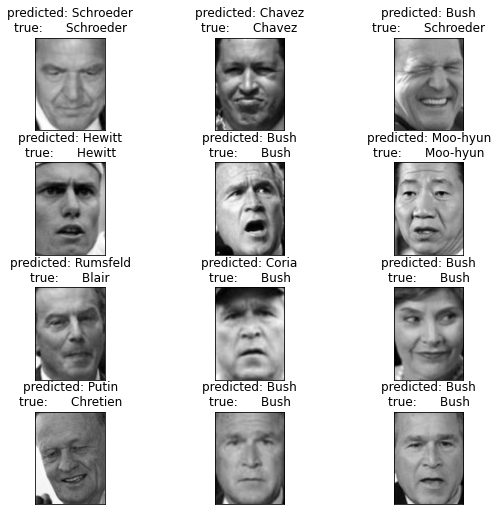

In [ ]:
def title(best_pred, y_test, target_names, i):
    pred_name = names[best_pred[i]].rsplit(' ', 1)[-1]
    true_name = names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(best_pred, y_test, names, i)
                     for i in range(best_pred.shape[0])]

plot_wrong_and_correct(X_test, prediction_titles, h, w)

## PCA или TSNE?


*конкретно* тут для лучшего предсказания я воспользовался PCA, потому что для лучшего качества нам нужно большее количество возможных компонент, чем у T-SNE (max = 3), плюс PCA модель я смог применять к новым данным